In [1]:
import pandas as pd
import urllib.request 
import json 
from pandas.io.json import json_normalize 
dur = ['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
      '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910']
total = pd.DataFrame()
for i in range(len(dur)):
    url = 'https://open.jejudatahub.net/api/proxy/DtaDa0555D801Da508DbDtt5t1bat1ta/889p694trp9t_e98p8jrep96b_erecc8?startDate='+dur[i]+'&endDate='+dur[i]
    # url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")

    # 받은 데이터가 문자열이라서 이를 json으로 변환한다.
    json_object = json.loads(json_str)

    #데이터 프레임으로 
    df=pd.json_normalize(json_object['data'])
    total = pd.concat([df,total])
total

,dtYearMonth,visitorCnt,visitPurpose
0,201910,121053,친지방문
1,201910,193546,레저스포츠
2,201910,118238,회의및업무
3,201910,729136,휴양및관람
4,201910,1044280,개별여행
...,...,...,...
4,201801,29762,패키지
5,201801,931530,개별여행
6,201801,234,교육여행
7,201801,2936,기타방문


In [5]:
total.to_csv('[임시]18-19년관광객.csv',encoding='cp949',index=False)

In [235]:
total.visitorCnt = pd.to_numeric(total.visitorCnt)
total.dtYearMonth = pd.to_numeric(total.dtYearMonth)
total = total.sort_values(by=['dtYearMonth'],ascending=True)
print(total)
total.dtYearMonth = total.dtYearMonth.astype(str)
total.info()

    dtYearMonth  visitorCnt visitPurpose
8        201801       78741         친지방문
0        201801       78743        회의및업무
1        201801      126413        레저스포츠
2        201801       83664        부분패키지
7        201801        2936         기타방문
..          ...         ...          ...
6        201910       60936         교육여행
5        201910      121052        부분패키지
4        201910     1044280         개별여행
3        201910      729136        휴양및관람
0        201910      121053         친지방문

[198 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 8 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dtYearMonth   198 non-null    object
 1   visitorCnt    198 non-null    int64 
 2   visitPurpose  198 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


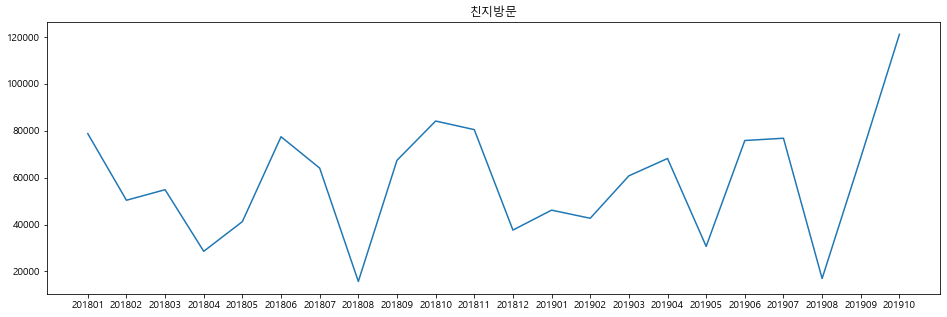

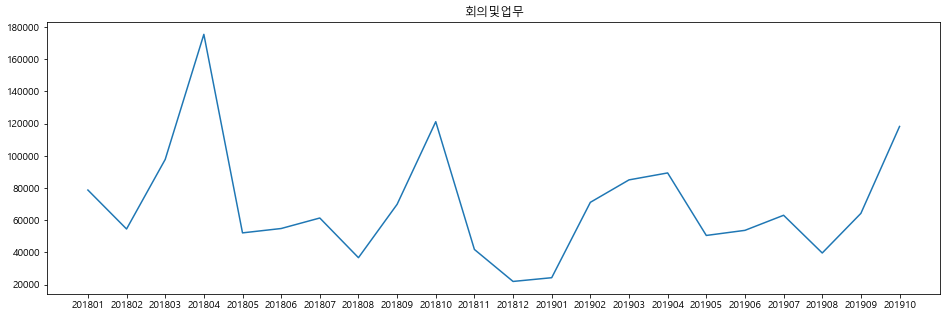

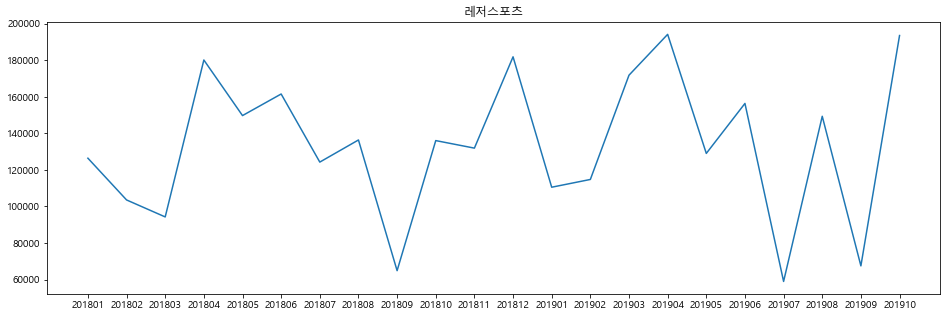

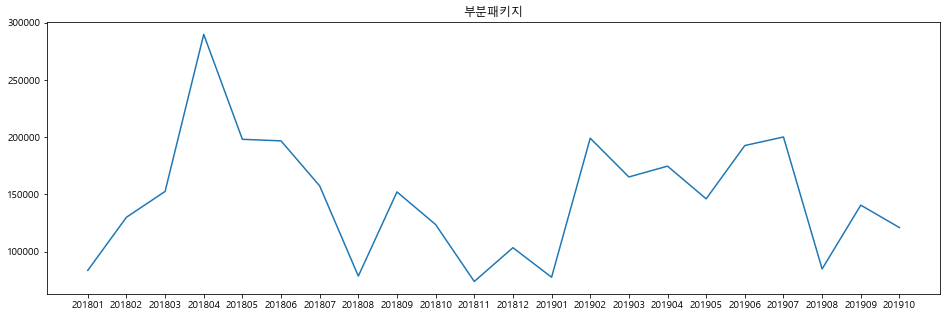

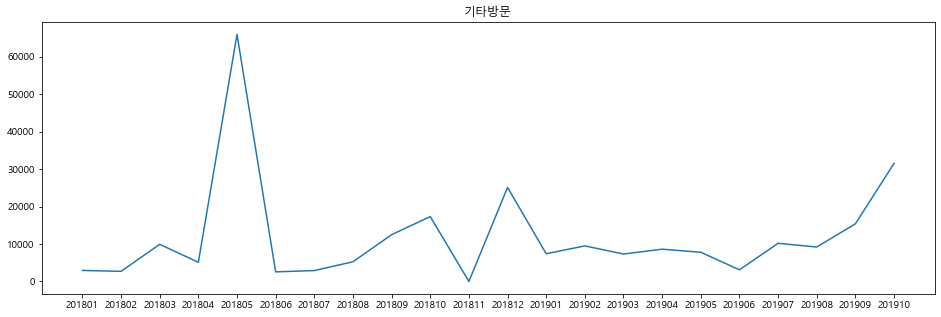

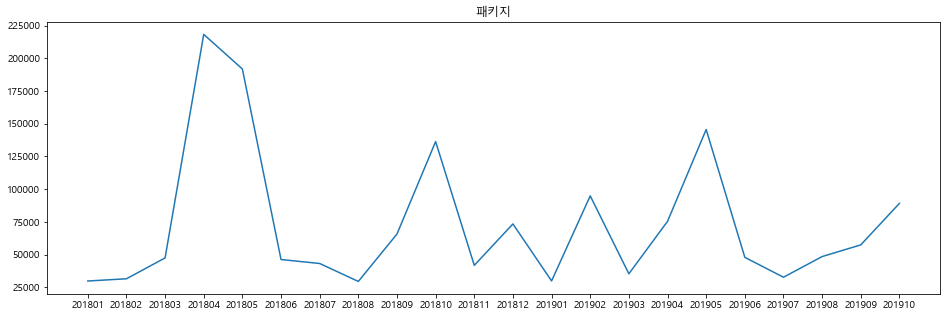

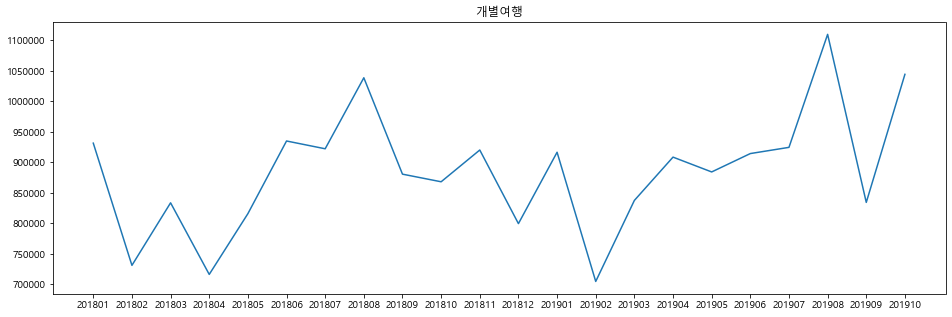

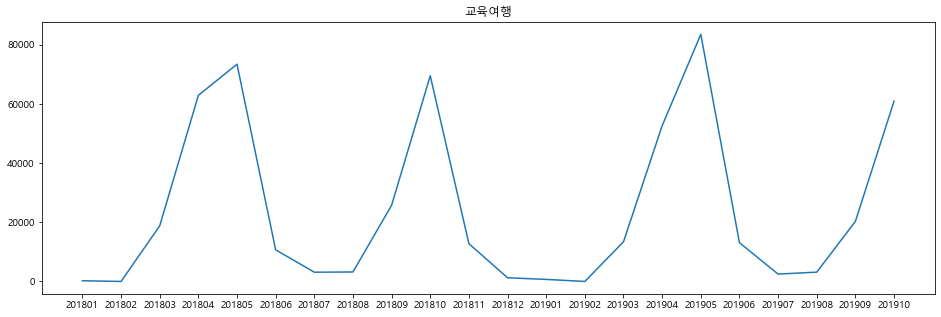

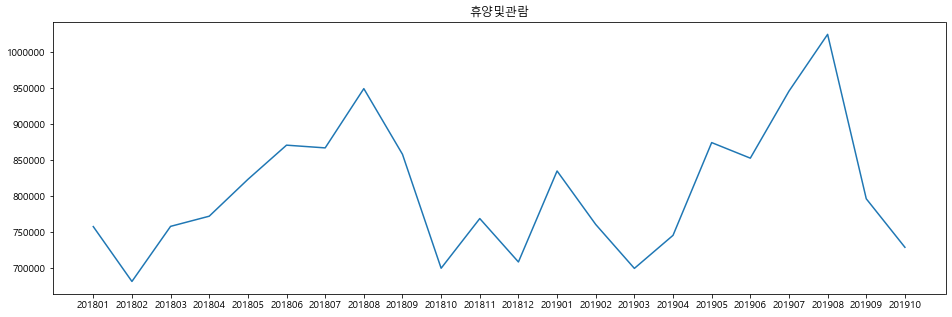

In [243]:
from matplotlib import pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
uni = total.visitPurpose.unique()
for i in uni:
    pp = total[total.visitPurpose ==  i ]
    fig,ax = plt.subplots(figsize=(16,5))
    plt.title(i)
    plt.plot(pp.dtYearMonth,pp.visitorCnt)

C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\sdsasgad\lib\site-package

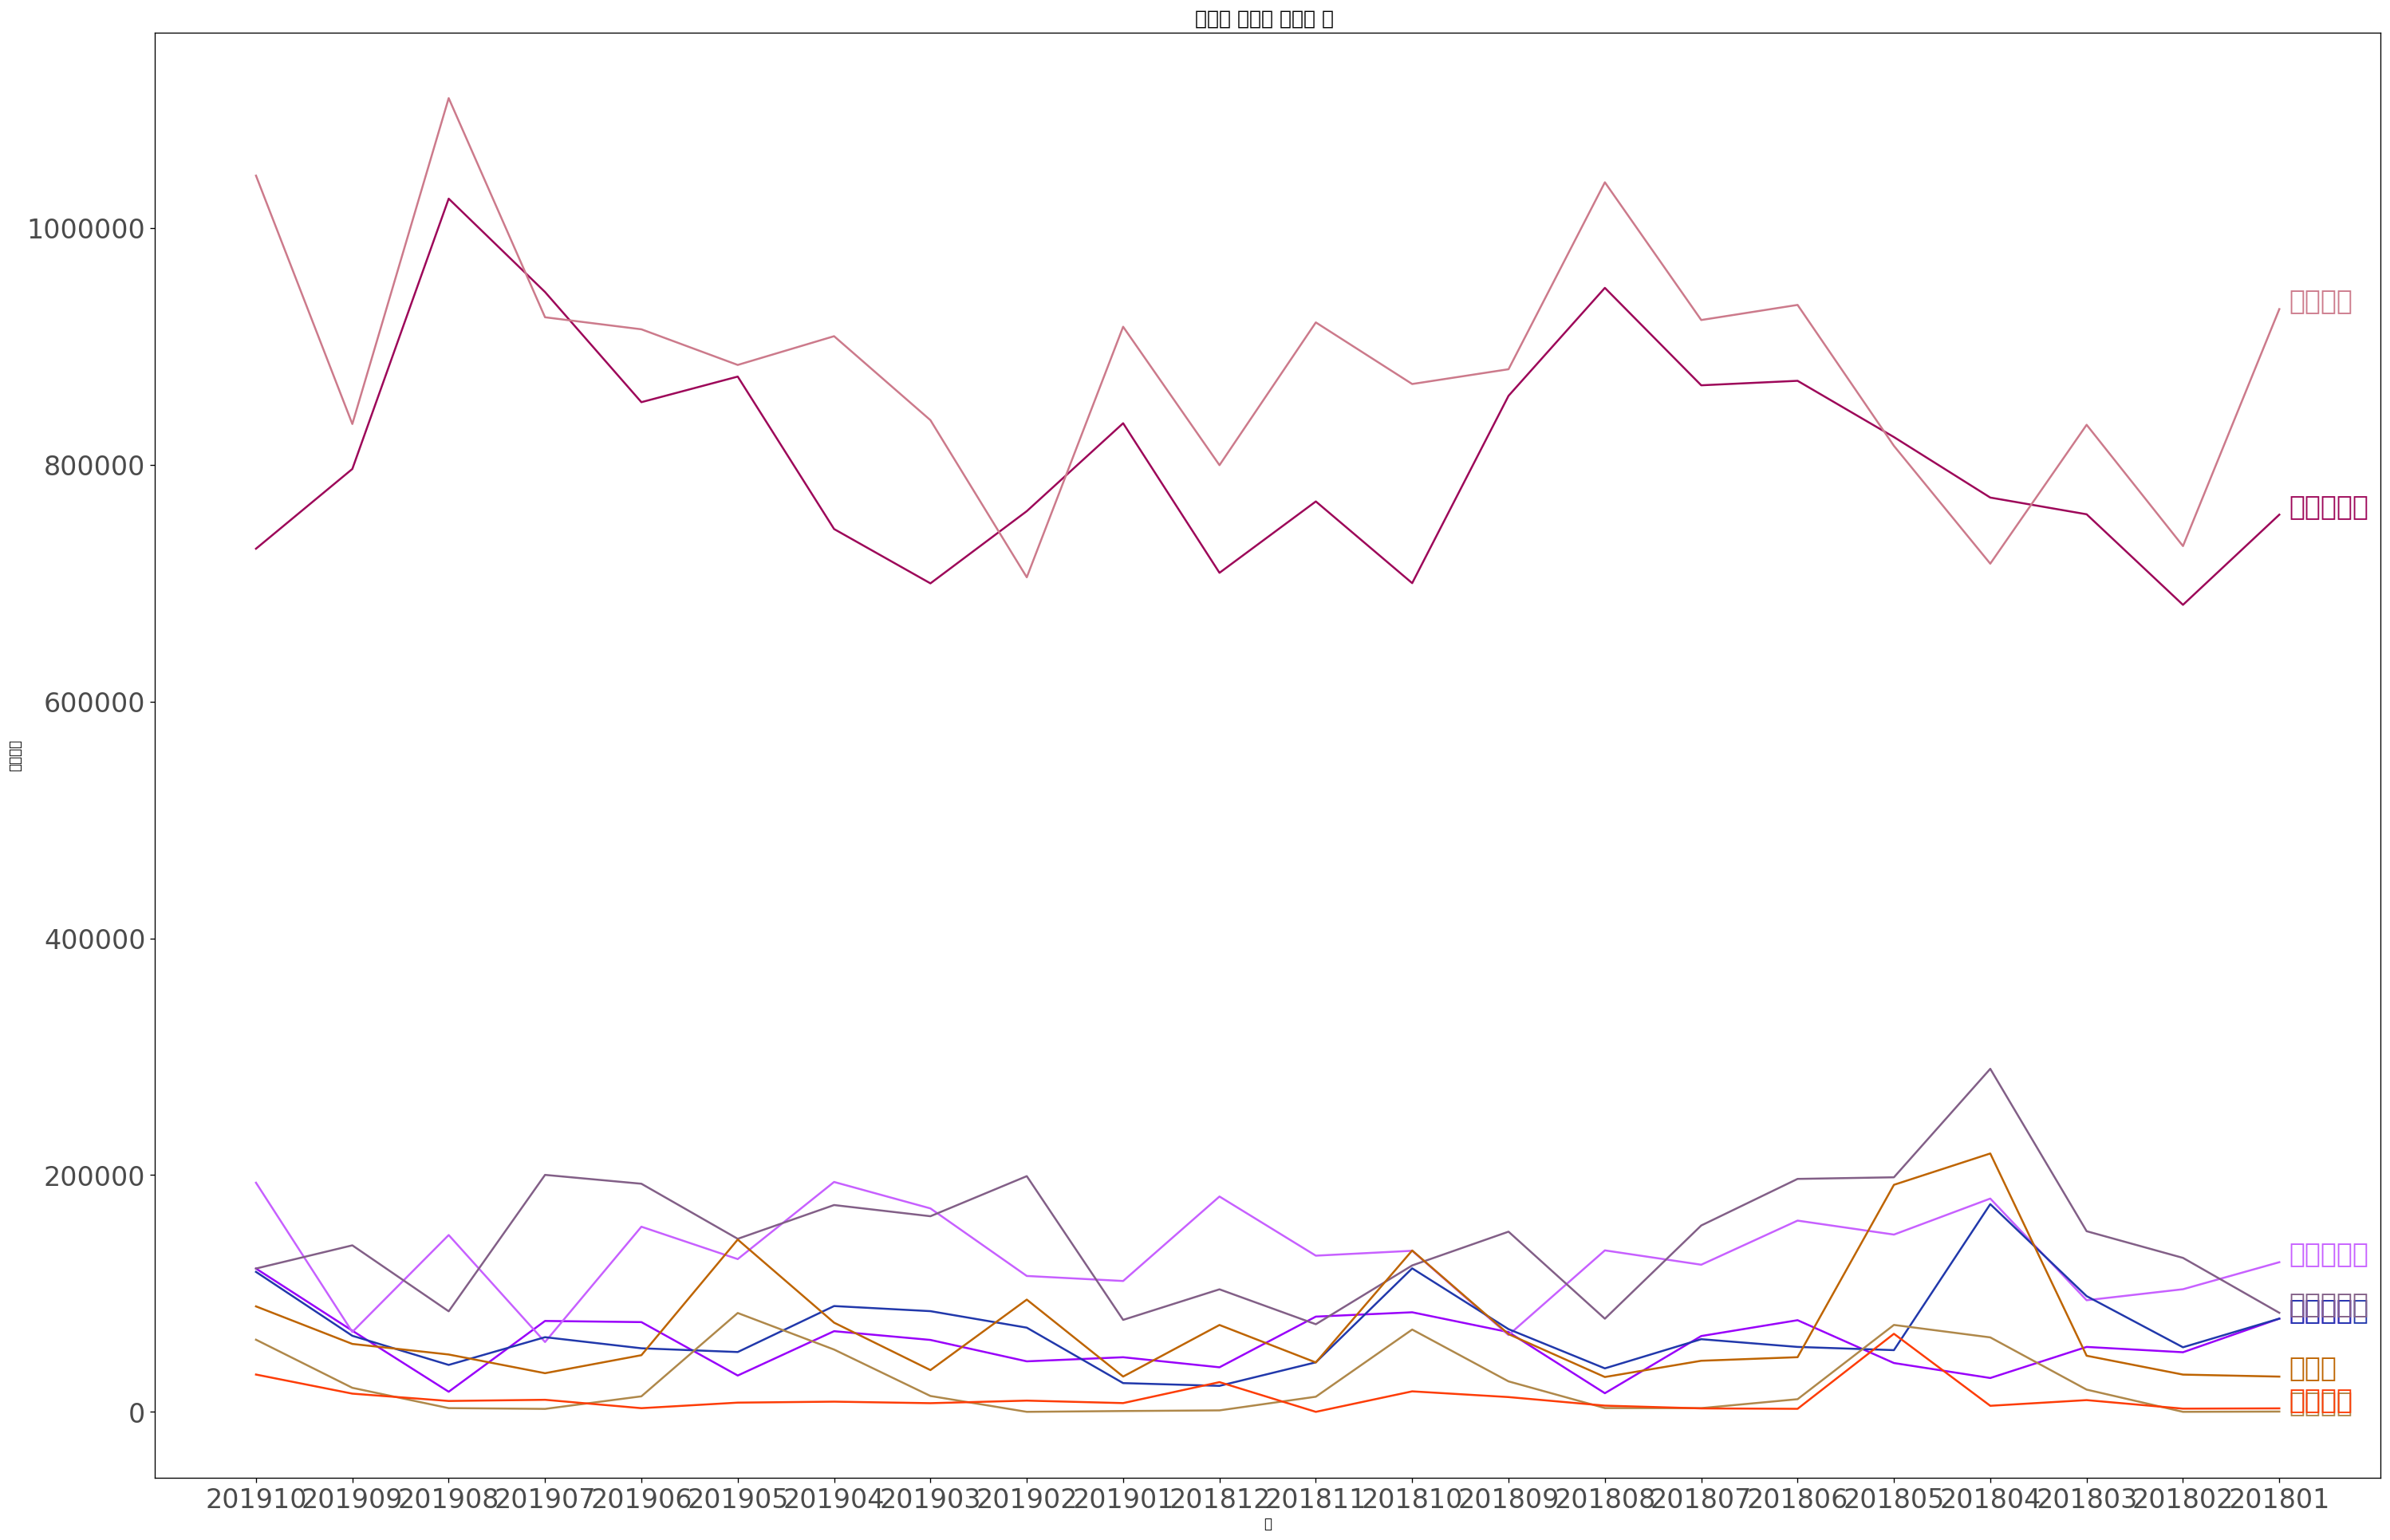

In [10]:
plt.rcParams['font.family']='Malgun Gothic'
uni = total.visitPurpose.unique()
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(uni), replace=False)

plt.figure(figsize=(30,20), dpi= 120)
for i, y in enumerate(uni):
    if i >= 0:
        plt.plot('dtYearMonth', 'visitorCnt', data=total[total.visitPurpose==y], color=mycolors[i], label=y)
        plt.text(total[total.visitPurpose==y].shape[0]-0.9, total.loc[total.visitPurpose==y, 'visitorCnt'][-1:].values[0], y, fontsize=20, color=mycolors[i])

plt.gca().set(ylabel='방문객수', xlabel='월')
plt.xticks(fontsize=20, alpha=.7)
plt.yticks(fontsize=20, alpha=.7)
plt.title("유형별 제주도 입도객 수 ", fontsize=15)
plt.show()